<a href="https://colab.research.google.com/github/skadali8-ai/2023005610_programs.ipynb/blob/main/2023005610AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 EXPERIMENT 1

In [ ]:
num1 = input("Enter first number:")
num2 = input("Enter second number:")
sum = float(num1) + float(num2)
print('The sum of {0} and {1} is {2}'.format(num1,num2,sum))


EXPERIMENT 2

In [ ]:
import random
number = random.randint(1,100)
guess = 0
while guess != number:
  guess = int(input("Enter Guess: "))
  if (guess < number):
    print("Guess higher!")
  elif (guess > number):
      print("Guess lower!")

  else:
        print("You won!")


Enter Guess: 25
Guess higher!
Enter Guess: 50
Guess higher!
Enter Guess: 75
Guess lower!
Enter Guess: 60
Guess higher!
Enter Guess: 65
Guess higher!
Enter Guess: 68
Guess higher!
Enter Guess: 69
Guess higher!
Enter Guess: 70
Guess higher!
Enter Guess: 73
You won!


EXPERIMENT 3

In [ ]:
class VacuumCleaner1x2:
    def __init__(self, dirty_positions=[(0, 0), (1, 0)]):
        self.x = 0  # Start at left tile (0,0)
        self.y = 0
        self.room_width = 2
        self.room = [['C' for _ in range(self.room_width)]]
        for (dx, dy) in dirty_positions:
            if 0 <= dx < self.room_width and dy == 0:
                self.room[dy][dx] = 'D'
        print("Vacuum Cleaner initialized at position (0, 0)")
        self.display_room()
        self.clean_tile()

    def move(self, direction):
        if direction == 'RIGHT' and self.x < self.room_width - 1:
            self.x += 1
        elif direction == 'LEFT' and self.x > 0:
            self.x -= 1
        else:
            print("Invalid move or boundary reached.")
            return
        print(f"\nMoved {direction} to ({self.x}, {self.y})")
        self.clean_tile()

    def clean_tile(self):
        if self.room[self.y][self.x] == 'D':
            self.room[self.y][self.x] = 'C'
            print(f"Cleaned tile at ({self.x}, {self.y})")
        else:
            print(f"Tile at ({self.x}, {self.y}) is already clean.")
        self.display_room()

    def display_room(self):
        print("\nRoom status (C = Clean, D = Dirty):")
        row = ""
        for col in range(self.room_width):
            if self.x == col:
                row += f"V({self.room[0][col]}) "
            else:
                row += f" {self.room[0][col]} "
        print(row + "\n")


if __name__ == "__main__":
    cleaner = VacuumCleaner1x2(dirty_positions=[(0, 0), (1, 0)])
    commands = ['RIGHT', 'LEFT']
    for cmd in commands:
        cleaner.move(cmd)


Vacuum Cleaner initialized at position (0, 0)

Room status (C = Clean, D = Dirty):
V(D)  D 

Cleaned tile at (0, 0)

Room status (C = Clean, D = Dirty):
V(C)  D 


Moved RIGHT to (1, 0)
Cleaned tile at (1, 0)

Room status (C = Clean, D = Dirty):
 C V(C) 


Moved LEFT to (0, 0)
Tile at (0, 0) is already clean.

Room status (C = Clean, D = Dirty):
V(C)  C 



 EXPERIMENT 4

In [ ]:
from collections import deque

# Define all locations
locations = ['A', 'B', 'C']  # 'A': Initial position of the monkey; 'B': Initial position of the box

# Define the goal state
GOAL = ('C', 'C', True, True)  # Monkey and box at C, monkey on box, has banana

# Define possible actions
def get_possible_actions(state):
    monkey, box, on_box, has_banana = state
    actions = []

    if has_banana:
        return []  # Goal reached, no more actions needed

    # Walk to other locations
    for loc in locations:
        if loc != monkey:
            actions.append(('walk', loc))

    # Push box if at same location and not on box
    if monkey == box and not on_box:
        for loc in locations:
            if loc != monkey:
                actions.append(('push', loc))

    # Climb up/down
    if monkey == box:
        if not on_box:
            actions.append(('climb_up',))
        else:
            actions.append(('climb_down',))

    # Grab banana if under it and on the box
    if monkey == 'C' and box == 'C' and on_box:
        actions.append(('grab',))

    return actions

# Apply action and return new state
def apply_action(state, action):
    monkey, box, on_box, has_banana = state

    if action[0] == 'walk':
        return (action[1], box, False, has_banana)  # Walking causes monkey to climb down if on box

    elif action[0] == 'push':
        return (action[1], action[1], False, has_banana)  # Monkey and box move together

    elif action[0] == 'climb_up':
        return (monkey, box, True, has_banana)

    elif action[0] == 'climb_down':
        return (monkey, box, False, has_banana)

    elif action[0] == 'grab':
        return (monkey, box, on_box, True)

    return state

# BFS to find path to goal
def solve():
    start = ('A', 'B', False, False)  # monkey_position, box_position, monkey_on_box, has_banana
    queue = deque()
    queue.append((start, []))
    visited = set()

    while queue:
        current_state, path = queue.popleft()

        if current_state == GOAL:
            return path + [("Goal Reached!",)]

        if current_state in visited:
            continue
        visited.add(current_state)

        for action in get_possible_actions(current_state):
            new_state = apply_action(current_state, action)
            if new_state not in visited:
                queue.append((new_state, path + [action]))

    return None

# Run the solver
solution = solve()

# Print the solution path
if solution:
    for step in solution:
        print(step)



('walk', 'B')
('push', 'C')
('climb_up',)
('grab',)
('Goal Reached!',)


In [ ]:
EXPERIMENT 5

In [ ]:
a = int(input("Enter Jug A Capacity: "))
b = int(input("Enter Jug B Capacity: "))
ai = int(input("Initially Water in Jug A: "))
bi = int(input("Initially Water in Jug B: "))
af = int(input("Final State of Jug A: "))
bf = int(input("Final State of Jug B: "))

print("List Of Operations You can Do:\n")
print("1.Fill Jug A Completely\n")
print("2.Fill Jug B Completely\n")
print("3.Empty Jug A Completely\n")
print("4.Empty Jug B Completely\n")
print("5.Pour From Jug A till Jug B filled Completely or A becomes empty\n")
print("6.Pour From Jug B till Jug A filled Completely or B becomes empty\n")
print("7.Pour all From Jug B to Jug A\n")
print("8.Pour all From Jug A to Jug B\n")

while ((ai != af or bi != bf)):
    op = int(input("Enter the Operation: "))
    if (op == 1):
        ai = a
    elif (op == 2):
        bi = b
    elif (op == 3):
        ai = 0
    elif (op == 4):
        bi = 0
    elif (op == 5):
        if (b - bi > ai):
            bi = ai + bi
            ai = 0
        else:
            ai = ai - (b - bi)
            bi = b
    elif (op == 6):
        if (a - ai > bi):
            ai = ai + bi
            bi = 0
        else:
            bi = bi - (a - ai)
            ai = a
    elif (op == 7):
        ai = ai + bi
        bi = 0
    elif (op == 8):
        bi = bi + ai
        ai = 0
    print(ai, bi)


Enter Jug A Capacity: 4
Enter Jug B Capacity: 3
Initially Water in Jug A: 0
Initially Water in Jug B: 0
Final State of Jug A: 2
Final State of Jug B: 0
List Of Operations You can Do:

1.Fill Jug A Completely

2.Fill Jug B Completely

3.Empty Jug A Completely

4.Empty Jug B Completely

5.Pour From Jug A till Jug B filled Completely or A becomes empty

6.Pour From Jug B till Jug A filled Completely or B becomes empty

7.Pour all From Jug B to Jug A

8.Pour all From Jug A to Jug B

Enter the Operation: 2
0 3
Enter the Operation: 6
3 0
Enter the Operation: 2
3 3
Enter the Operation: 6
4 2
Enter the Operation: 3
0 2
Enter the Operation: 6
2 0


**EXPERIMENT 6

In [ ]:
class Node:
    def __init__(self, data, level, fval):
        # Initialize the node with the data, level of the node, and the calculated fvalue
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        # Generate child nodes from the given node by moving the blank space
        # either in the four directions: {up, down, left, right}
        x, y = self.find(self.data, '_')
        # val_list contains position values for moving the blank space in either of
        # the 4 directions [up, down, left, right] respectively.
        val_list = [[x, y - 1], [x, y + 1], [x - 1, y], [x + 1, y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data, x, y, i[0], i[1])
            if child is not None:
                child_node = Node(child, self.level + 1, 0)
                children.append(child_node)
        return children

    def shuffle(self, puz, x1, y1, x2, y2):
        # Move the blank space in the given direction and if the position values are out
        # of limits, then return None
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None

    def copy(self, root):
        # Copy function to create a similar matrix of the given node
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp

    def find(self, puz, x):
        # Specifically used to find the position of the blank space
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data)):
                if puz[i][j] == x:
                    return i, j

class Puzzle:
    def __init__(self, size):
        # Initialize the puzzle size by the specified size, open and closed lists to empty
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        # Accepts the puzzle from the user
        puz = []
        for i in range(0, self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self, start, goal):
        # Heuristic function to calculate Heuristic value f(x) = h(x) + g(x)
        return self.h(start.data, goal) + start.level

    def h(self, start, goal):
        # Calculates the difference between the given puzzles
        temp = 0
        for i in range(0, self.n):
            for j in range(0, self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp

    def process(self):
        # Accept Start and Goal Puzzle state
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")
        goal = self.accept()
        start = Node(start, 0, 0)
        start.fval = self.f(start, goal)
        # Put the start node in the open list
        self.open.append(start)
        print("\n\n")

        while True:
            cur = self.open[0]
            print("==================================================\n")
            for i in cur.data:
                for j in i:
                    print(j, end=" ")
                print("")
            # If the difference between the current and goal node is 0, we have reached the goal node
            if (self.h(cur.data, goal) == 0):
                break

            for i in cur.generate_child():
                i.fval = self.f(i, goal)
                self.open.append(i)

            self.closed.append(cur)
            del self.open[0]
            # Sort the open list based on f value
            self.open.sort(key=lambda x: x.fval, reverse=False)

puz = Puzzle(3)
puz.process()


Enter the start state matrix 

1 2 3
5 6 _
7 8 4
Enter the goal state matrix 

1 2 3
5 8 6
7 _ 4




1 2 3 
5 6 _ 
7 8 4 

1 2 3 
5 _ 6 
7 8 4 

1 2 3 
5 8 6 
7 _ 4 


EXPERIMENT 7

In [ ]:
from collections import deque

def bfs_shortest_path(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()

    while queue:
        current_node, path = queue.popleft()

        if current_node == goal:
            return path

        visited.add(current_node)

        for neighbor in graph.get(current_node, []):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                visited.add(neighbor)

    return None

graph = {}
n = int(input("Enter number of edges in the unweighted graph: "))
print("Enter edges (format: A B means edge between A and B):")
for _ in range(n):
    u, v = input().split()
    graph.setdefault(u, []).append(v)
    graph.setdefault(v, []).append(u)  # undirected graph

start = input("Enter start node: ")
goal = input("Enter goal node: ")

path = bfs_shortest_path(graph, start, goal)
if path:
    print("Shortest path using BFS:", ' -> '.join(path))
else:
    print("No path found.")


Enter number of edges in the unweighted graph: 5
Enter edges (format: A B means edge between A and B):
A B
C D
B C
D E
A E
Enter start node: A
Enter goal node: D
Shortest path using BFS: A -> E -> D


EXPERIMENT 8


In [ ]:
import heapq

def dijkstra(graph, start, goal):
    heap = [(0, start, [start])]
    visited = set()

    while heap:
        cost, current_node, path = heapq.heappop(heap)

        if current_node == goal:
            return path, cost

        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor, weight in graph.get(current_node, []):
            if neighbor not in visited:
                heapq.heappush(heap, (cost + weight, neighbor, path + [neighbor]))

    return None, float('inf')

graph = {}
n = int(input("Enter number of edges in the weighted graph: "))
print("Enter edges (format: A B weight):")
for _ in range(n):
    u, v, w = input().split()
    w = int(w)
    graph.setdefault(u, []).append((v, w))
    graph.setdefault(v, []).append((u, w))  # undirected graph

start = input("Enter start node: ")
goal = input("Enter goal node: ")

path, cost = dijkstra(graph, start, goal)
if path:
    print("Shortest path using Dijkstra:", ' -> '.join(path))
    print("Total cost:", cost)
else:
    print("No path found.")


Enter number of edges in the weighted graph: 5
Enter edges (format: A B weight):
A B 2
B C 3
C D 4
D E 5
A E 10
Enter start node: A
Enter goal node: D
Shortest path using Dijkstra: A -> B -> C -> D
Total cost: 9


exp 9

In [ ]:
import math

def print_board(board):
    for row in board:
        print("|".join(row))
    print("-" * 9)

def is_moves_left(board):
    for row in board:
        if "_" in row:
            return True
    return False

def evaluate(board):
    # Checking Rows
    for row in board:
        if row[0] == row[1] == row[2] and row[0] != "_":
            return 10 if row[0] == "X" else -10
    # Checking Columns
    for col in range(3):
        if board[0][col] == board[1][col] == board[2][col] and board[0][col] != "_":
            return 10 if board[0][col] == "X" else -10
    # Checking Diagonals
    if board[0][0] == board[1][1] == board[2][2] and board[0][0] != "_":
        return 10 if board[0][0] == "X" else -10
    if board[0][2] == board[1][1] == board[2][0] and board[0][2] != "_":
        return 10 if board[0][2] == "X" else -10
    return 0

def minimax(board, depth, alpha, beta, is_max):
    score = evaluate(board)

    if score == 10:
        return score - depth
    if score == -10:
        return score + depth
    if not is_moves_left(board):
        return 0

    if is_max:
        best = -math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == "_":
                    board[i][j] = "X"
                    val = minimax(board, depth + 1, alpha, beta, False)
                    best = max(best, val)
                    alpha = max(alpha, best)
                    board[i][j] = "_"
                    if beta <= alpha:
                        return best
        return best
    else:
        best = math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == "_":
                    board[i][j] = "O"
                    val = minimax(board, depth + 1, alpha, beta, True)
                    best = min(best, val)
                    beta = min(beta, best)
                    board[i][j] = "_"
                    if beta <= alpha:
                        return best
        return best

def find_best_move(board):
    best_val = -math.inf
    best_move = (-1, -1)
    for i in range(3):
        for j in range(3):
            if board[i][j] == "_":
                board[i][j] = "X"
                move_val = minimax(board, 0, -math.inf, math.inf, False)
                board[i][j] = "_"
                if move_val > best_val:
                    best_move = (i, j)
                    best_val = move_val
    return best_move

def play_game():
    board = [["_"] * 3 for _ in range(3)]
    print("TIC-TAC-TOE Game! You are 'O' and AI is 'X'")
    print_board(board)

    for turn in range(9):
        if turn % 2 == 0:
            print("\nAI's Move:")
            move = find_best_move(board)
            board[move[0]][move[1]] = "X"
        else:
            print("\nYour Move (row col): ")
            row, col = map(int, input().split())
            if board[row][col] == "_":
                board[row][col] = "O"
            else:
                print("Invalid Move! Try Again")
                continue

        print_board(board)
        score = evaluate(board)
        if score == 10:
            print("AI (X) WINS!")
            return
        elif score == -10:
            print("You (O) win!")
            return

    print("It's a draw!")

if __name__ == "__main__":
    play_game()


TIC-TAC-TOE Game! You are 'O' and AI is 'X'
_|_|_
_|_|_
_|_|_
---------

AI's Move:
X|_|_
_|_|_
_|_|_
---------

Your Move (row col): 
0 1
X|O|_
_|_|_
_|_|_
---------

AI's Move:
X|O|_
X|_|_
_|_|_
---------

Your Move (row col): 
1 0
Invalid Move! Try Again

AI's Move:
X|O|_
X|_|_
X|_|_
---------
AI (X) WINS!


EXPERIMENT 10

In [ ]:
# Python Program to illustrate
# Hangman Game
import random
from collections import Counter
someWords = '''apple banana mango strawberry
orange grape pineapple apricot lemon coconut watermelon
cherry papaya berry peach lychee muskmelon'''
someWords = someWords.split(' ')
# randomly choose a secret word from our "someWords" LIST.
word = random.choice(someWords)
if __name__ == '__main__':
    print('Guess the word! HINT: word is a name of a fruit')
    for i in word:
        # For printing the empty spaces for letters of the word
        print('_', end=' ')
    print()
    playing = True
    # List for storing the letters guessed by the player
    letterGuessed = ''
    chances = len(word) + 2
    correct = 0
    flag = 0
    try:
        while (chances != 0) and flag == 0:  # Flag is updated when the word is correctly guessed
            print()
            chances -= 1
            try:
                guess = str(input('Enter a letter to guess: '))
            except:
                print('Enter only a letter!')
                continue
            # Validation of the guess
            if not guess.isalpha():
                print('Enter only a LETTER')
                continue
            elif len(guess) > 1:
                print('Enter only a SINGLE letter')
                continue
            elif guess in letterGuessed:
                print('You have already guessed that letter')
                continue
            # If letter is guessed correctly
            if guess in word:
                # k stores the number of times the guessed letter occurs in the word
                k = word.count(guess)
                for _ in range(k):
                    letterGuessed += guess  # The guessed letter is added as many times as it occurs
            # Print the word
            for char in word:
                if char in letterGuessed and (Counter(letterGuessed) != Counter(word)):
                    print(char, end=' ')
                    correct += 1
                # If user has guessed all the letters
                # Once the correct word is guessed fully,
                elif (Counter(letterGuessed) == Counter(word)):
                    # the game ends, even if chances remain
                    print("The word is: ", end=' ')
                    print(word)
                    flag = 1
                    print('Congratulations, You won!')
                    break  # To break out of the for loop
                    break  # To break out of the while loop
                else:
                    print('_', end=' ')
        # If user has used all of his chances
        if chances <= 0 and (Counter(letterGuessed) != Counter(word)):
            print()
            print('You lost! Try again..')
            print('The word was {}'.format(word))
    except KeyboardInterrupt:
        print()
        print('Bye! Try again.')
        exit()


Guess the word! HINT: word is a name of a fruit
_ _ _ _ _ 

Enter a letter to guess: a
a _ _ _ _ 
Enter a letter to guess: n
a _ _ _ _ 
Enter a letter to guess: p
a p p _ _ 
Enter a letter to guess: l
a p p l _ 
Enter a letter to guess: e
The word is:  apple
Congratulations, You won!


exp 9

In [ ]:
from sympy import symbols
from sympy.logic.boolalg import And, Or, Not
from pyDatalog import pyDatalog

P, Q = symbols('P Q')
expr = And(P, Q)

print(expr.subs({P: True, Q: True}))
print(expr.subs({P: True, Q: False}))

pyDatalog.create_terms('parent, X')

+ parent('Alice', 'Bob')

print(parent('Alice', X))


True
False
X  
---
Bob


 Program 11: Hardcoding Variables


In [ ]:
#title Version 1: Predefined Values
a = 12
b = 7
sum_result = a + b
print(f"Constant Addition: {a} + {b} = {sum_result}")

Constant Addition: 12 + 7 = 19


Program 12: Keyboard Input

In [ ]:
#title Version 2: User Data Entry
try:
    num1 = int(input("Enter number 1: "))
    num2 = int(input("Enter number 2: "))
    product = num1 * num2
    print(f"User Multiplication: {num1} × {num2} = {product}")
except ValueError:
    print("Please input valid numbers!")

Enter number 1: 2
Enter number 2: 3
User Multiplication: 2 × 3 = 6


Program 13: Read From File (Single Input)

In [ ]:
#title Version 3: Single File Read
# Create test file
with open("single.txt", "w") as f:
    f.write("30")

try:
    with open("single.txt", "r") as f:
        single_num = int(f.read().strip())
        double = single_num * 2
        print(f"Single File: {single_num} × 2 = {double}")
except:
    print("File read error!")

Single File: 30 × 2 = 60


In [ ]:
Program 14: Read From File (Multiple Inputs)

In [ ]:
#title Version 4: Multiple File Read
# Create test file
with open("multi.txt", "w") as f:
    f.write("4\n8\n12\n16")

try:
    with open("multi.txt", "r") as f:
        numbers = [int(line.strip()) for line in f.readlines()]
        total = sum(numbers)
        print(f"Multiple Files: {numbers}, Sum = {total}")
except:
    print("Multiple file error!")

Multiple Files: [4, 8, 12, 16], Sum = 40


Program 15: Combined version

In [ ]:
#title Version 5: All Methods
fixed = 10
try:
    user_num = int(input("Enter value: "))
    with open("combo.txt", "w") as f:
        f.write(str(user_num))
    with open("combo.txt", "r") as f:
        file_num = int(f.read().strip())
    result = fixed + user_num + file_num
    print(f"All Methods: {fixed} + {user_num} + {file_num} = {result}")
except:
    print("Combined error!")

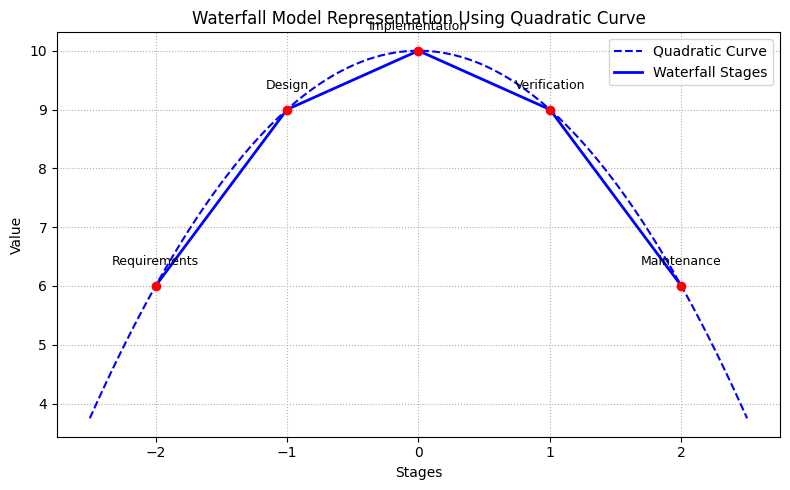

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Quadratic curve (smooth dashed line) -----
# Choose a simple downward parabola that roughly matches the picture
# You can tune a, b, c to change the shape.
a, b, c = -1, 0, 10          # y = a*x^2 + b*x + c
x_curve = np.linspace(-2.5, 2.5, 400)
y_curve = a * x_curve**2 + b * x_curve + c  # [web:8]

# ----- Waterfall step points (red dots, joined by blue lines) -----
# X values represent ordered stages; Y values are "heights" of each phase
# Adjust these numbers to match your exact figure.
stages = np.array([-2.0, -1.0,  0.0,  1.0,  2.0])  # Requirements, Design, Implementation, Verification, Maintenance
values = np.array([6.0,  9.0, 10.0,  9.0,  6.0])    # Example heights for each stage [conversation_history:1]

# ----- Plot -----
plt.figure(figsize=(8, 5))

# Quadratic curve
plt.plot(x_curve, y_curve, 'b--', label='Quadratic Curve')

# Waterfall representation: join points
plt.plot(stages, values, 'b-', linewidth=2, label='Waterfall Stages')  # blue line joining points
plt.scatter(stages, values, color='red', zorder=5)                     # red points [web:8]

# Labels for each stage above the red points
labels = ['Requirements', 'Design', 'Implementation', 'Verification', 'Maintenance']
for x, y, lab in zip(stages, values, labels):
    plt.text(x, y + 0.3, lab, ha='center', va='bottom', fontsize=9)

plt.title('Waterfall Model Representation Using Quadratic Curve')
plt.xlabel('Stages')
plt.ylabel('Value')
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

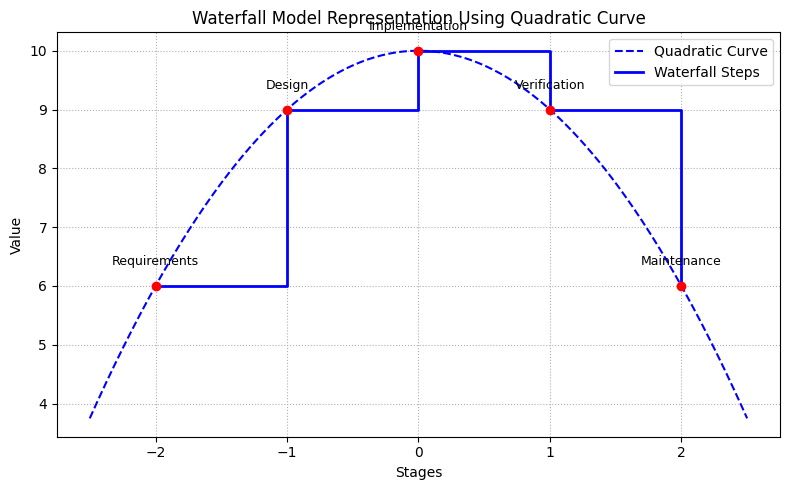

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ------- Quadratic curve (dashed) -------
a, b, c = -1, 0, 10                 # y = a*x^2 + b*x + c  [web:8]
x_curve = np.linspace(-2.5, 2.5, 400)
y_curve = a * x_curve**2 + b * x_curve + c

# ------- Discrete waterfall stage values -------
# You can adjust these to match your exact heights.
stage_x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])
stage_y = np.array([6.0, 9.0, 10.0, 9.0, 6.0])  # [conversation_history:1]

# ------- Build step coordinates (blocks) -------
xs = []
ys = []

for i in range(len(stage_x) - 1):
    # horizontal segment from stage i to i+1 at height stage_y[i]
    xs.extend([stage_x[i], stage_x[i+1]])
    ys.extend([stage_y[i], stage_y[i]])
    # vertical drop/rise at stage i+1 (up to next height)
    if i < len(stage_x) - 2:
        xs.extend([stage_x[i+1], stage_x[i+1]])
        ys.extend([stage_y[i], stage_y[i+1]])

# add last point so the plot ends at final stage
xs.append(stage_x[-1])
ys.append(stage_y[-1])

# ------- Plot -------
plt.figure(figsize=(8, 5))

# quadratic curve
plt.plot(x_curve, y_curve, 'b--', label='Quadratic Curve')

# blue block/step line
plt.plot(xs, ys, color='blue', linewidth=2, label='Waterfall Steps')

# red points at actual stage positions
plt.scatter(stage_x, stage_y, color='red', zorder=5)

# labels
labels = ['Requirements', 'Design', 'Implementation', 'Verification', 'Maintenance']
for x, y, lab in zip(stage_x, stage_y, labels):
    plt.text(x, y + 0.3, lab, ha='center', va='bottom', fontsize=9)

plt.title('Waterfall Model Representation Using Quadratic Curve')
plt.xlabel('Stages')
plt.ylabel('Value')
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()